In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [115]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [7]:
ds = Dataset('../../data/top200-3bins.json/')

In [8]:
novels = list(ds.novels())

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [38]:
the = [np.array(novel['counts']['the']) for novel in novels]

In [65]:
def plot_series(series):

    n = series.sum()
    p = 1 / len(series)

    mean = n * p
    var = mean * (1-p)
    std = np.sqrt(var)
    
    plt.figure(figsize=(2,2))

    plt.plot([0, len(series)-1], [mean, mean], c='orange', lw=0.5)

    plt.fill_between(
        range(len(series)),
        mean + 2*std,
        mean - 2*std,
        color='black',
        alpha=0.1,
    )

    plt.plot(series)
    plt.show()

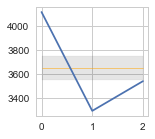

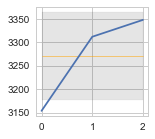

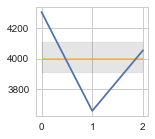

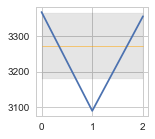

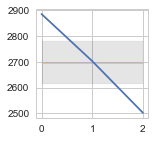

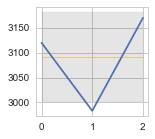

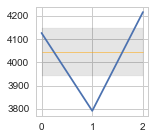

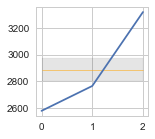

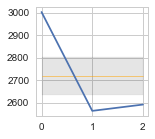

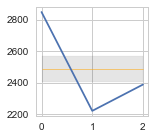

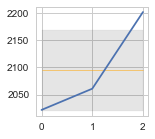

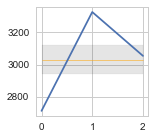

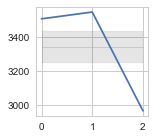

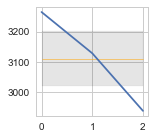

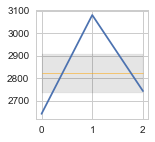

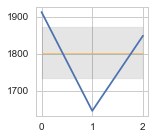

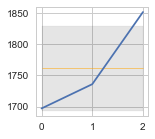

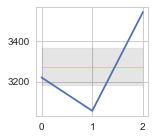

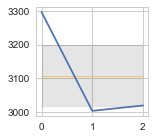

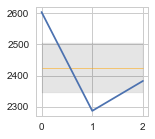

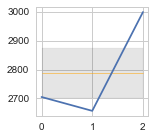

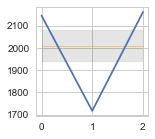

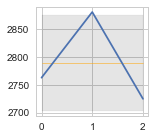

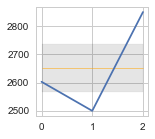

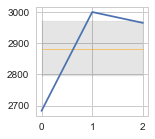

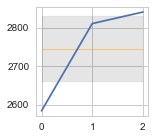

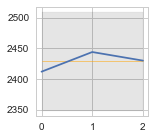

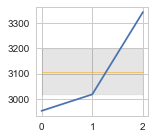

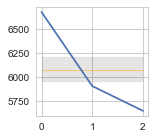

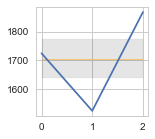

In [66]:
for series in the[:30]:
    plot_series(series)

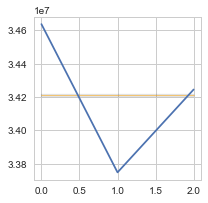

In [64]:
plot_series(np.stack(the).sum(0))

In [69]:
the_gale = [np.array(novel['counts']['the']) for novel in novels if novel['corpus']=='gale']
the_chicago = [np.array(novel['counts']['the']) for novel in novels if novel['corpus']=='chicago']

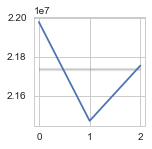

In [70]:
plot_series(np.stack(the_gale).sum(0))

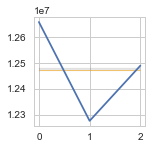

In [71]:
plot_series(np.stack(the_chicago).sum(0))

In [72]:
df = pd.DataFrame(novels)

In [129]:
df.columns

Index(['author_first', 'author_last', 'chicago_auth_canon',
       'chicago_auth_coterie', 'chicago_auth_date_b', 'chicago_auth_date_d',
       'chicago_auth_education', 'chicago_auth_gender',
       'chicago_auth_geography', 'chicago_auth_hyphenated_identity',
       'chicago_auth_id', 'chicago_auth_immigrant', 'chicago_auth_mfa',
       'chicago_auth_nationality', 'chicago_auth_race',
       'chicago_auth_religion', 'chicago_auth_secondary_occupation',
       'chicago_auth_ses', 'chicago_auth_sexual_identity', 'chicago_clean',
       'chicago_genre', 'chicago_libraries', 'chicago_nationality',
       'chicago_publ_city', 'chicago_publisher', 'chicago_source', 'corpus',
       'counts', 'gale_language', 'gale_ocr', 'identifier', 'pub_year',
       'title'],
      dtype='object')

In [81]:
def plot_df_token(df, token):
    counts = np.array([c[token] for c in df['counts']])
    plot_series(counts.sum(0))

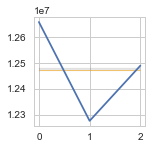

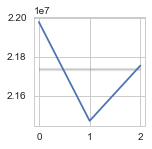

In [83]:
plot_df_token(df[df.corpus=='chicago'], 'the')
plot_df_token(df[df.corpus=='gale'], 'the')

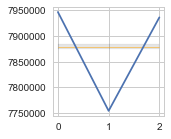

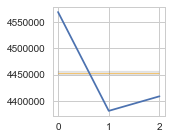

In [85]:
plot_df_token(df[df.chicago_auth_gender=='M'], 'the')
plot_df_token(df[df.chicago_auth_gender=='F'], 'the')

In [86]:
len(df[df.chicago_auth_gender=='M'])

4237

In [87]:
len(df[df.chicago_auth_gender=='F'])

2583

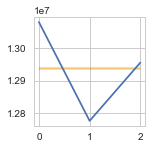

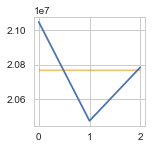

In [88]:
plot_df_token(df[df.pub_year < 1900], 'the')
plot_df_token(df[df.pub_year > 1900], 'the')

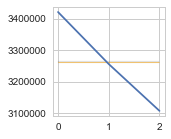

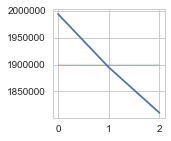

In [89]:
plot_df_token(df[df.chicago_auth_gender=='M'], 'a')
plot_df_token(df[df.chicago_auth_gender=='F'], 'a')

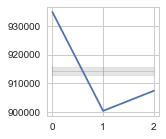

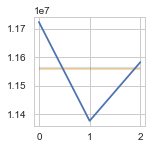

In [93]:
plot_df_token(df[df.chicago_auth_canon==True], 'the')
plot_df_token(df[df.chicago_auth_canon==False], 'the')

chicago_auth_canon -----
False


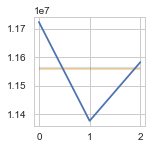

True


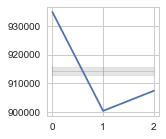

chicago_auth_gender -----
M


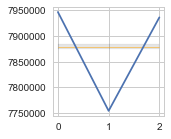

F


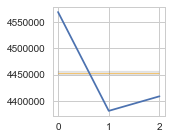

chicago_auth_immigrant -----
chicago_auth_ses -----
chicago_auth_sexual_identity -----
Straight


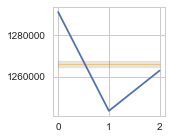

chicago_clean -----
True


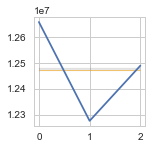

chicago_source -----
k


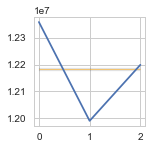

corpus -----
gale


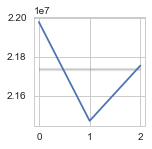

chicago


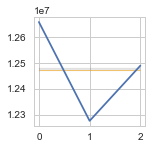

gale_language -----
English


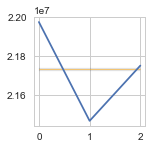

In [121]:
for col in df.columns:
    if col != 'counts' and len(df[col].unique()) < 10:
        print(col, '-----')
        for val in df[col].unique():
            if type(val) is str or not math.isnan(val):
                subdf = df[df[col]==val]
                if len(subdf) > 500:
                    print(val)
                    plot_df_token(df[df[col]==val], 'the')

chicago_auth_canon -----
False


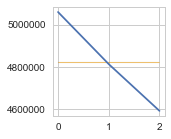

True


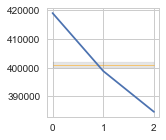

chicago_auth_gender -----
M


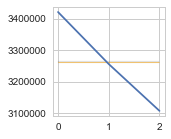

F


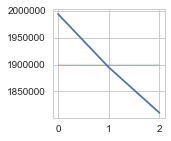

chicago_auth_immigrant -----
chicago_auth_ses -----
chicago_auth_sexual_identity -----
Straight


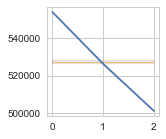

chicago_clean -----
True


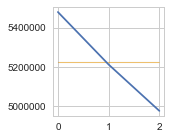

chicago_source -----
k


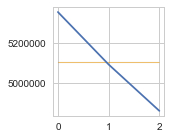

corpus -----
gale


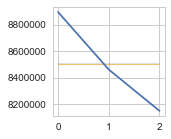

chicago


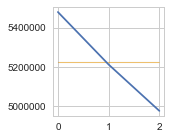

gale_language -----
English


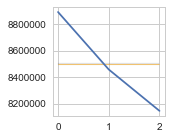

In [122]:
for col in df.columns:
    if col != 'counts' and len(df[col].unique()) < 10:
        print(col, '-----')
        for val in df[col].unique():
            if type(val) is str or not math.isnan(val):
                subdf = df[df[col]==val]
                if len(subdf) > 500:
                    print(val)
                    plot_df_token(df[df[col]==val], 'a')

chicago_auth_canon -----
False


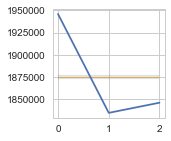

True


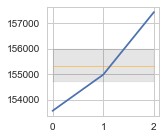

chicago_auth_gender -----
M


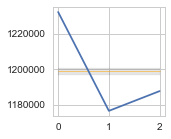

F


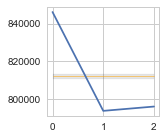

chicago_auth_immigrant -----
chicago_auth_ses -----
chicago_auth_sexual_identity -----
Straight


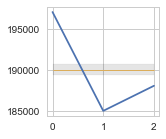

chicago_clean -----
True


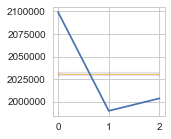

chicago_source -----
k


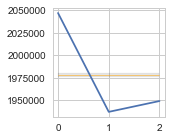

corpus -----
gale


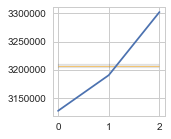

chicago


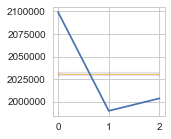

gale_language -----
English


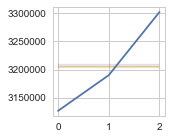

In [127]:
for col in df.columns:
    if col != 'counts' and len(df[col].unique()) < 10:
        print(col, '-----')
        for val in df[col].unique():
            if type(val) is str or not math.isnan(val):
                subdf = df[df[col]==val]
                if len(subdf) > 500:
                    print(val)
                    plot_df_token(df[df[col]==val], 'had')

In [132]:
np.random.multinomial(10000, [1/3, 1/3, 1/3])

array([3400, 3215, 3385])